# 11월 매수 4월 매도

In [1]:
!pip install finance-datareader

In [2]:
import FinanceDataReader as fdr

kospi = fdr.DataReader('KS11', '2002')
kospi.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2002-01-02,698.000000,725.059998,690.359985,724.950012,724.950012,618700.0
2002-01-03,726.760010,735.770020,722.349976,727.659973,727.659973,752600.0
2002-01-04,744.460022,750.830017,739.140015,747.719971,747.719971,630700.0
2002-01-07,748.539978,757.809998,735.549988,751.479980,751.479980,753600.0
2002-01-08,747.210022,750.890015,734.760010,734.760010,734.760010,799300.0


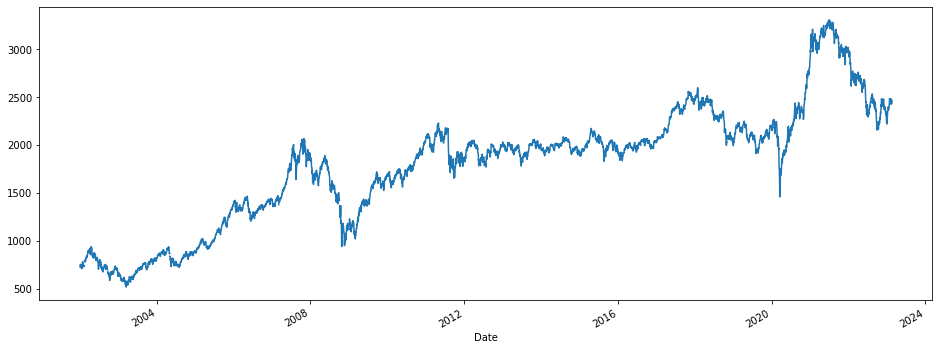

In [3]:
kospi['Close'].plot(figsize = (16, 6))

In [4]:
kospi['rate_of_return'] = kospi['Close'].pct_change()
kospi['cum_ror'] = (kospi['rate_of_return'] + 1).cumprod() - 1
today_cum_ror = kospi['cum_ror'].iloc[-1]
today_cum_ror

2.4082488697165507

In [11]:
start_date = kospi.index[0]
end_date = kospi.index[-1]
year = (end_date - start_date).days / 365

CAGR = (1 + today_cum_ror) ** (1/year) - 1
CAGR

0.05972770144373607

### [실습] 삼성전자의 연평균 수익률, 누적수익률을 계산

In [12]:
# CAGR = (1 + 누적수익률) ** (1/투자년도) - 1
samsung = fdr.DataReader('005930', '2002')
samsung.head()

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2002-01-02,5660,6160,5620,6160,1142079,0.103943
2002-01-03,6100,6190,6020,6040,885636,-0.019481
2002-01-04,6380,6410,6290,6380,1009482,0.056291
2002-01-07,6260,6430,6170,6360,1029132,-0.003135
2002-01-08,6390,6390,6190,6230,760142,-0.020440


In [17]:
samsung['rate_of_return'] = samsung['Close'].pct_change()
samsung['cum_ror'] = (samsung['rate_of_return'] + 1).cumprod() - 1
samsung_cum_ror = samsung['cum_ror'].iloc[-1]

start_date = samsung.index[0]
end_date = samsung.index[-1]
year = (end_date - start_date).days / 365

samsung_CAGR = (1 + samsung_cum_ror) ** (1/year) - 1
samsung_CAGR

0.1166950766478605

### 할로윈 투자

In [19]:
kospi.head()

,Open,High,Low,Close,Adj Close,Volume,rate_of_return,cum_ror
Date,,,,,,,,
2002-01-02,698.000000,725.059998,690.359985,724.950012,724.950012,618700.0,NaN,NaN
2002-01-03,726.760010,735.770020,722.349976,727.659973,727.659973,752600.0,0.003738,0.003738
2002-01-04,744.460022,750.830017,739.140015,747.719971,747.719971,630700.0,0.027568,0.031409
2002-01-07,748.539978,757.809998,735.549988,751.479980,751.479980,753600.0,0.005029,0.036596
2002-01-08,747.210022,750.890015,734.760010,734.760010,734.760010,799300.0,-0.022249,0.013532


In [ ]:
# 코스피의 월별 수익률의 총합을 바그래프로 그리기(5min, 3시 6분까지)

# 월초 Open, 월 말의 Close  / 월(Month) / 수익률(rate_of_return)

# resample / date -> month -> groupby

In [31]:
# 월별로 정렬 -> 같은 월에 데이터를 모아준다.
month_kospi_price = kospi.resample('MS').agg({'Open':'first', 'Close':'last'})

# 수익률 계산
month_kospi_price['rate_of_return'] = month_kospi_price.pct_change(axis = 1).iloc[:,-1]

# 월 데이터 추출
month_kospi_price['Month'] = month_kospi_price.index.month

# 같은 월끼리 sum
sum_month_ror = month_kospi_price.groupby('Month').sum()[['rate_of_return']]
sum_month_ror.head()

,rate_of_return
Month,
1,-0.011423
2,0.130230
3,0.225519
4,0.548773
5,-0.084862


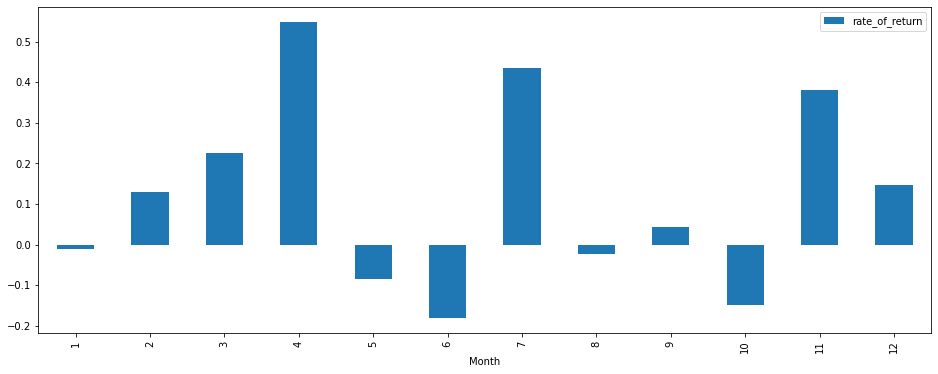

In [32]:
sum_month_ror.plot.bar(figsize = (16,6))

In [33]:
month_kospi_price.head()

,Open,Close,rate_of_return,Month
Date,,,,
2002-01-01,698.000000,748.070007,0.071734,1
2002-02-01,757.070007,819.989990,0.083110,2
2002-03-01,842.210022,895.580017,0.063369,3
2002-04-01,900.469971,842.340027,-0.064555,4
2002-05-01,855.409973,796.400024,-0.068984,5


In [38]:
# 단순보유 누적 수익률
print(f'buy and hold 누적 수익률 : {today_cum_ror}')

buy and hold 누적 수익률 : 2.4082488697165507


### 11월에 매수, 4월에 매도

In [42]:
kospi_price = month_kospi_price[['Open', 'Close','Month']].copy()
kospi_price.head()

,Open,Close,Month
Date,,,
2002-01-01,698.000000,748.070007,1
2002-02-01,757.070007,819.989990,2
2002-03-01,842.210022,895.580017,3
2002-04-01,900.469971,842.340027,4
2002-05-01,855.409973,796.400024,5


In [45]:
subset_kospi_price = kospi_price[kospi_price['Month'].isin([4, 11])]
subset_kospi_price.head()

,Open,Close,Month
Date,,,
2002-04-01,900.469971,842.340027,4
2002-11-01,652.340027,724.799988,11
2003-04-01,529.070007,599.349976,4
2003-11-01,783.080017,796.179993,11
2004-04-01,878.780029,862.840027,4


In [69]:
month4 = subset_kospi_price[subset_kospi_price['Month'] == 4][['Close']] # 4월 close
month11 = subset_kospi_price[subset_kospi_price['Month'] == 11][['Open']] # 11월 open
month4_lag1 = month4.shift(-1)

In [78]:
month4_lag1.index = month4_lag1.index.year
month11.index = month11.index.year

In [80]:
import pandas as pd
HWN_kospi_price = pd.concat([month4_lag1, month11], axis = 1)
HWN_kospi_price.head()

,Close,Open
Date,,
2002,599.349976,652.340027
2003,862.840027,783.080017
2004,911.299988,832.520020
2005,1419.729980,1165.770020
2006,1542.239990,1372.030029


In [82]:
HWN_kospi_price['rate_of_return'] = (HWN_kospi_price['Close'] / HWN_kospi_price['Open'])  - 1
HWN_kospi_price.head()

,Close,Open,rate_of_return
Date,,,
2002,599.349976,652.340027,-0.081231
2003,862.840027,783.080017,0.101854
2004,911.299988,832.520020,0.094628
2005,1419.729980,1165.770020,0.217847
2006,1542.239990,1372.030029,0.124057


In [84]:
HWN_kospi_price['cum_ror'] = (HWN_kospi_price['rate_of_return'] + 1).cumprod() - 1
HWN_kospi_price.tail()

,Close,Open,rate_of_return,cum_ror
Date,,,,
2018,2203.590088,2035.109985,0.082787,1.793271
2019,1947.560059,2084.790039,-0.065824,1.609405
2020,3147.860107,2276.610107,0.382696,2.608015
2021,2695.050049,2984.179932,-0.096888,2.258443
2022,NaN,2301.580078,NaN,NaN


In [88]:
HWN_kospi_price = HWN_kospi_price.dropna(axis = 0)

In [89]:
last_cum_ror = HWN_kospi_price['cum_ror'].iloc[-1]

In [94]:
year = HWN_kospi_price.index[-1] - HWN_kospi_price.index[0]
HWN_CAGR = (1 + last_cum_ror) ** (1/year) - 1
HWN_CAGR

0.06414432930380065

# S&P500

In [ ]:
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
sp500 = fdr.DataReader('US500', '2002')